In [1]:
# !pip install -r requirements.txt

# **<ins style="color:green">Mathematic Transformer</ins>**
- ## **Function Transformer**
  - Log
  - Sq / Sqrt
- ## **Power Transformer**
  - Box-Cox
  - Yeo Johnson
- ## **Quantile Transformer**

## **<ins style="color:red">Power Transformer</ins>**

## **Box-Cox Transformer**
- Given data can be convert into Normal distribution.
- The exponent here is a variable called `lambda(λ)` that varies over the range of -5 to 5, and in the process of searching, we examine all values of __λ__. Finally, we choose the optimal value (resulting in the best approximation to a normal distribution) for your variable.
- Box-Cox transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution. In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests.
- xi ** λ = [(xi**λ - 1) / λ    if λ != 0]

             [ln(xi)   if λ = 0]
- Box-Cox transform is only applicable for +ve value. It is not applicable on -ve and 0 values.
- **Yeo-Johnson Transfomation** : This transformation is somewhat of an adjustment of the Box-Cox transformation, by which we can apply it to negative numbers.

#### **Note:- :** Generaly the PowerTransformer() perform better than the FunctionTransformer().

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv("../data/concrete_data.csv")
df.sample(7)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
548,289.0,0.0,0.0,192.0,0.0,913.2,895.3,28,25.57
373,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,100,46.23
915,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99
658,305.3,203.5,0.0,203.5,0.0,965.4,631.0,7,25.89
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
422,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14,31.81
638,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28,38.21


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, [-1]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [11]:
# Applying Regression without any trasformation
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)*100

62.75531792314848

In [12]:
# cross checking with cross validation
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))*100

27.820729160873753

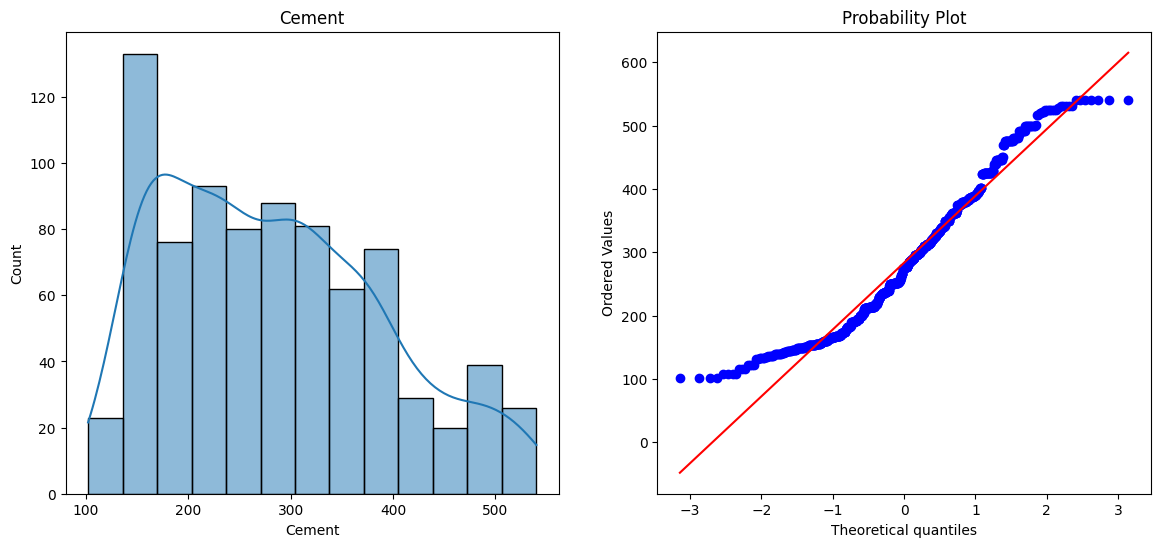

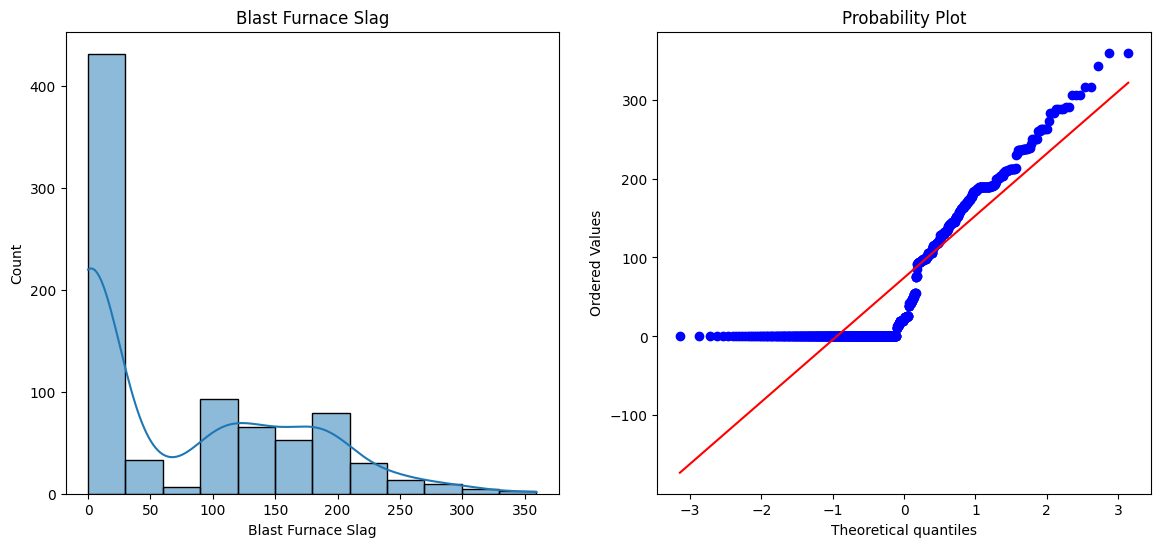

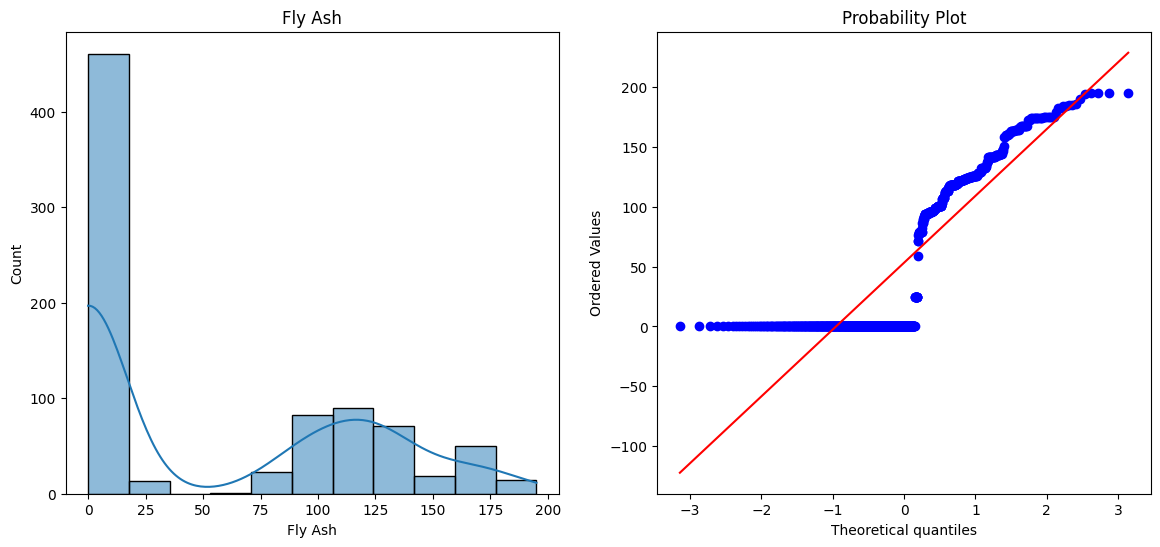

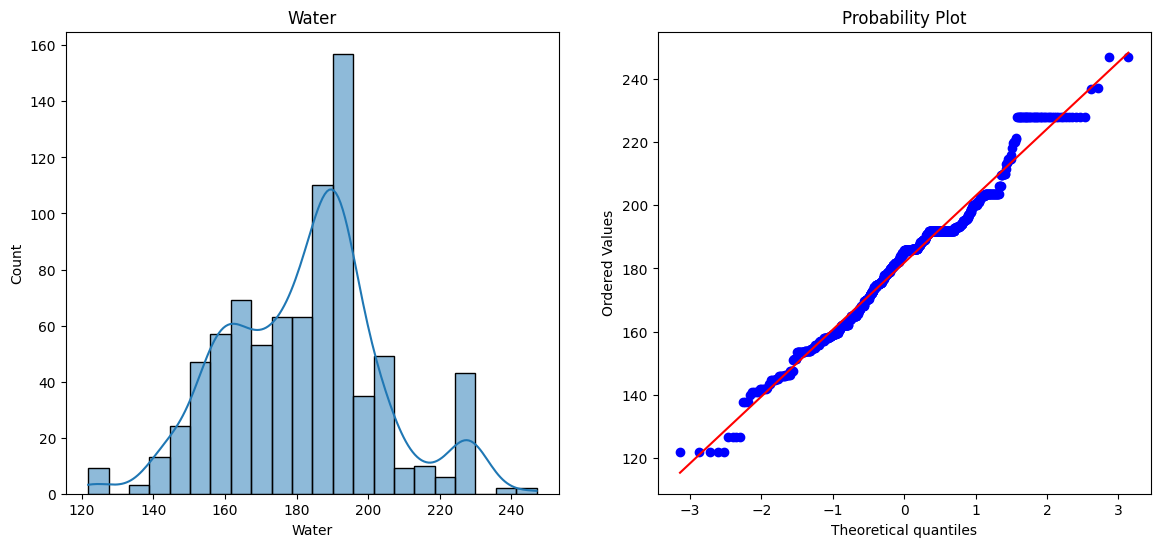

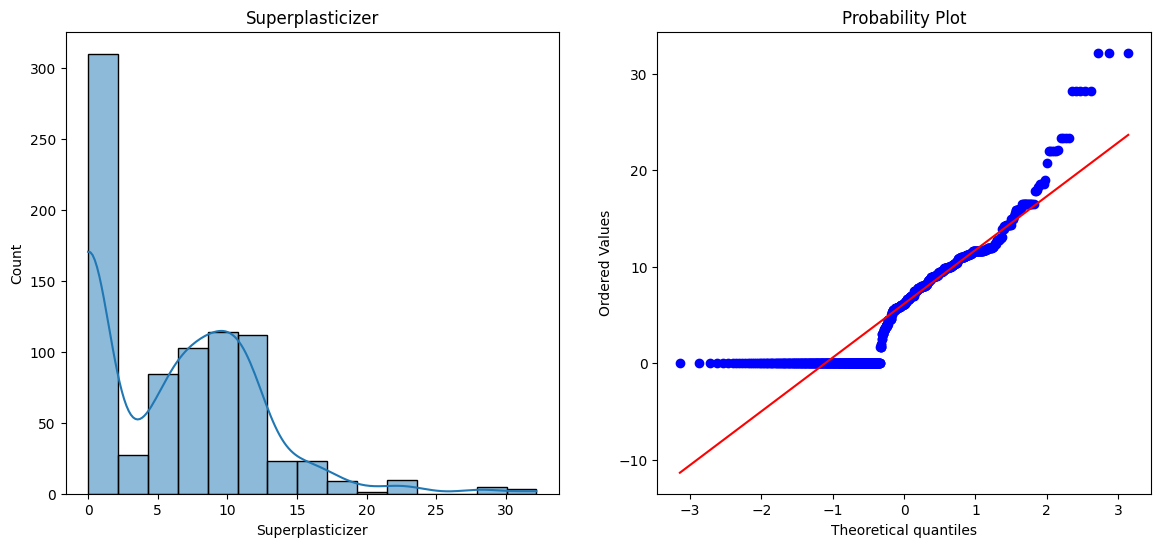

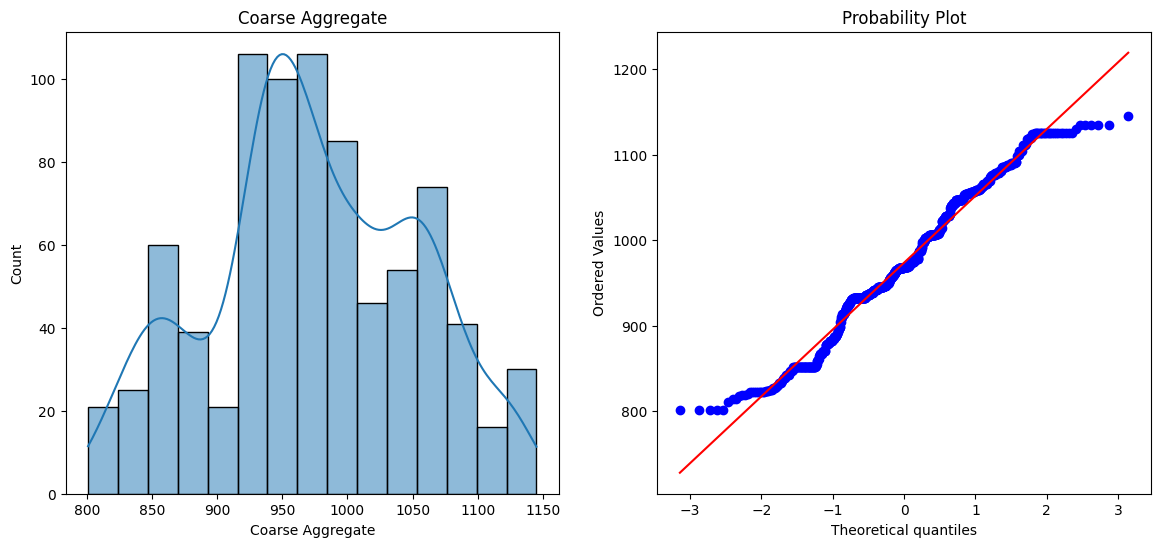

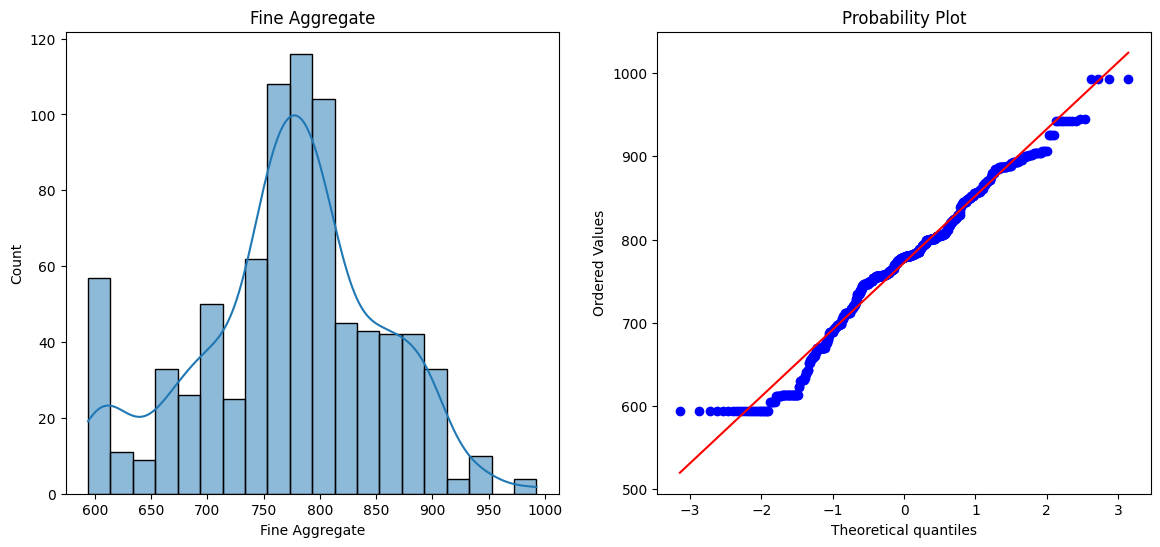

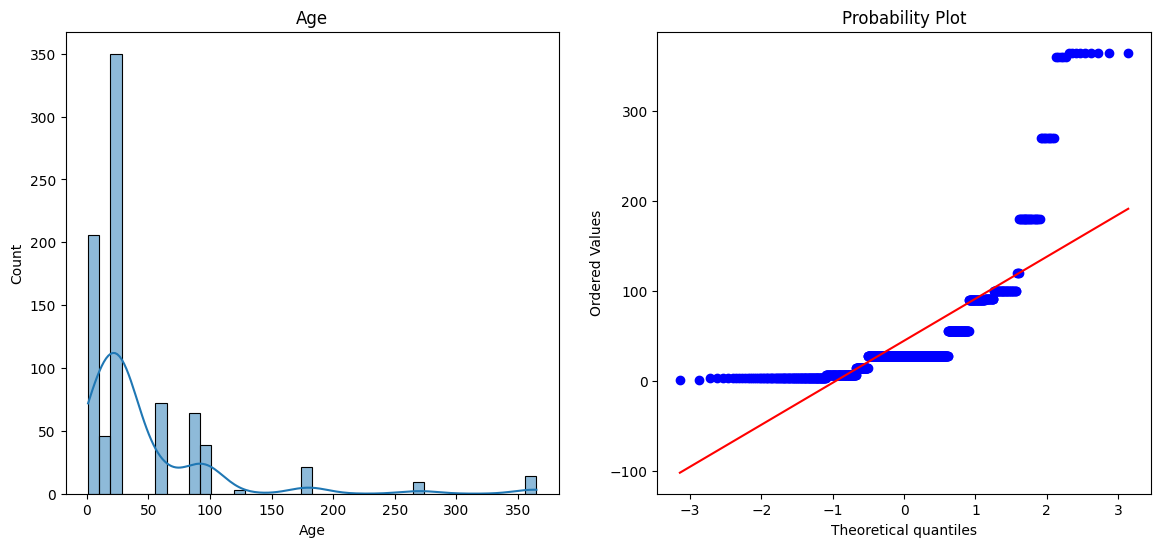

In [13]:
# Plotting the distplots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)

    plt.show()

## **<ins style="color:maroon">Applying Box-Cox Transform</ins>**

In [14]:
# Applying Box-Cox Transform
pt = PowerTransformer(method='box-cox')
X_train_trf = pt.fit_transform(X_train+0.000001)
X_test_trf = pt.transform(X_test+0.000001)

lmd = pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_})
lmd

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [15]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [16]:
X_train_trf[0]

array([-1.27975148,  0.9561511 ,  1.12804495, -0.30191978,  0.89850562,
       -0.26250009, -0.67756848,  0.10600969])

In [17]:
# Applying linear regression on transformed data
lr = LinearRegression()
lr.fit(X_train_trf, y_train)
y_pred_trf = lr.predict(X_test_trf)
r2_score(y_test, y_pred_trf)*100

80.47825006181188

In [18]:
# cross checking with cross validation
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train_trf, y_train, scoring='r2', cv=10))*100

79.1457709587773

In [19]:
X_train_trf = pd.DataFrame(X_train_trf, columns=X_train.columns)
X_train_trf

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.956151,1.128045,-0.301920,0.898506,-0.262500,-0.677568,0.106010
1,1.244706,0.701994,1.137577,-0.165055,0.749235,-1.912728,-0.314062,0.106010
2,0.079842,-1.085667,1.131407,-1.047291,0.788486,1.018407,0.025957,-1.675970
3,-0.145641,0.898125,1.096514,0.581224,0.733792,-1.750779,0.583253,0.106010
4,-1.131044,0.787203,1.133149,-1.105297,0.811152,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,0.997079,-0.887212,-1.769923,0.820684,0.390563,0.358776,-1.675970
820,-0.198733,-1.085667,1.133622,-1.839129,0.838861,1.445973,0.322797,-0.475625
821,-0.844517,-1.085667,1.133681,-0.706089,0.788486,1.345367,0.297157,1.246733
822,1.565624,0.925496,-0.887212,-0.019311,0.761011,-1.537255,0.076211,0.106010


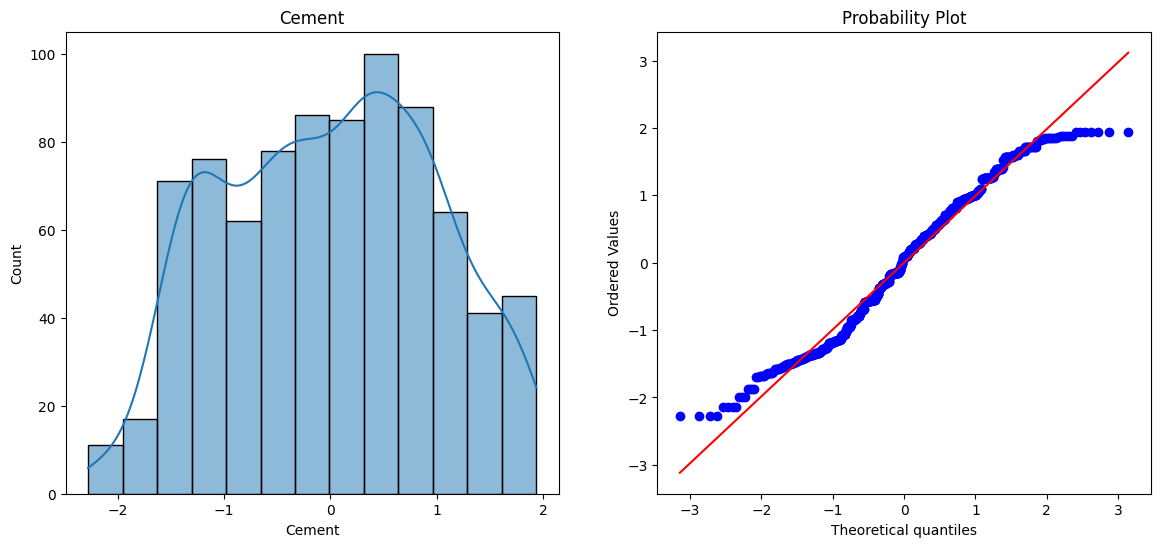

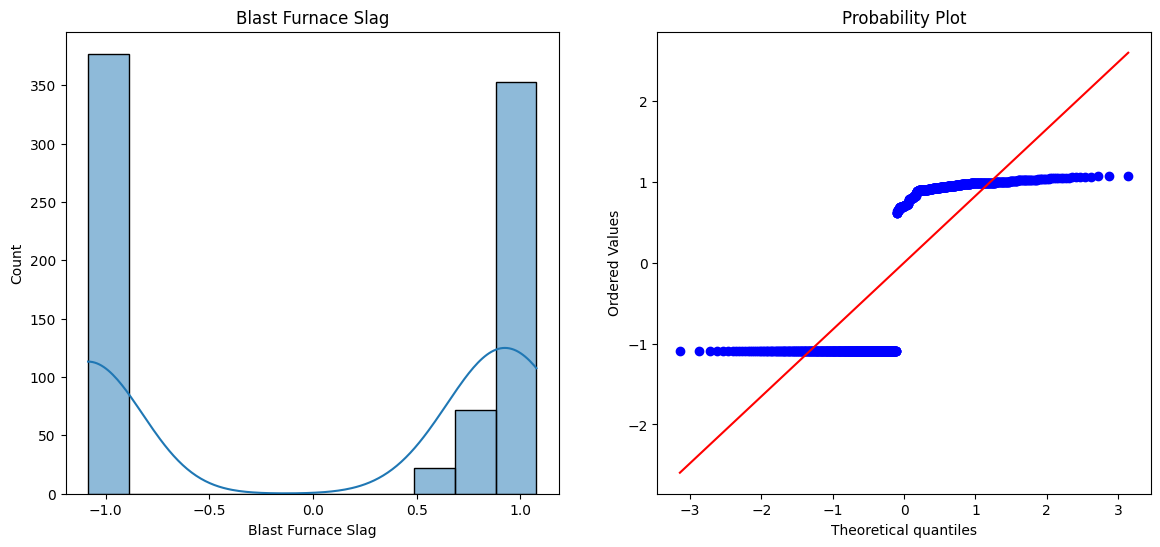

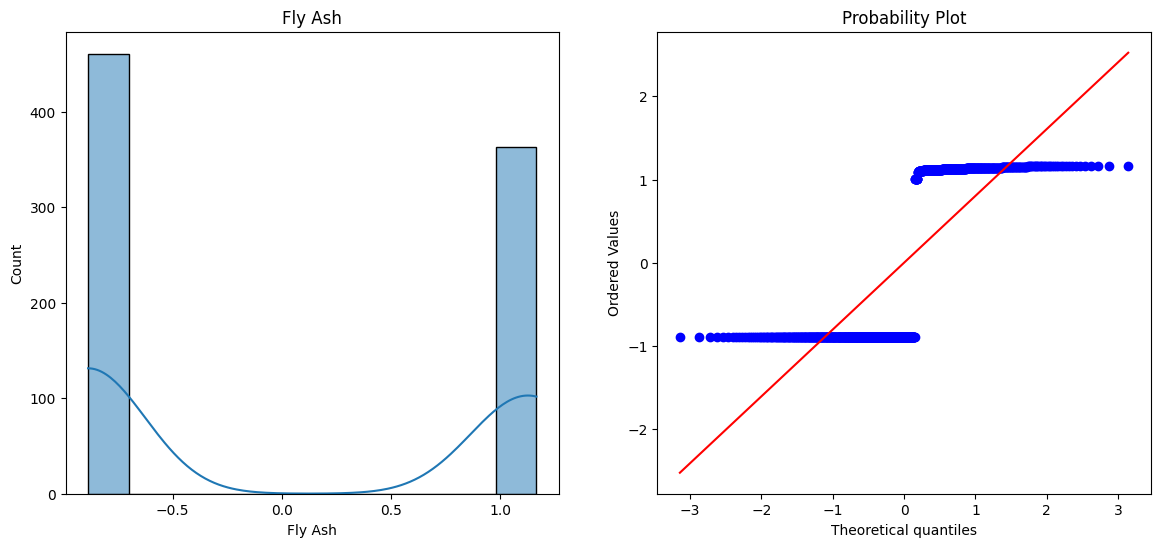

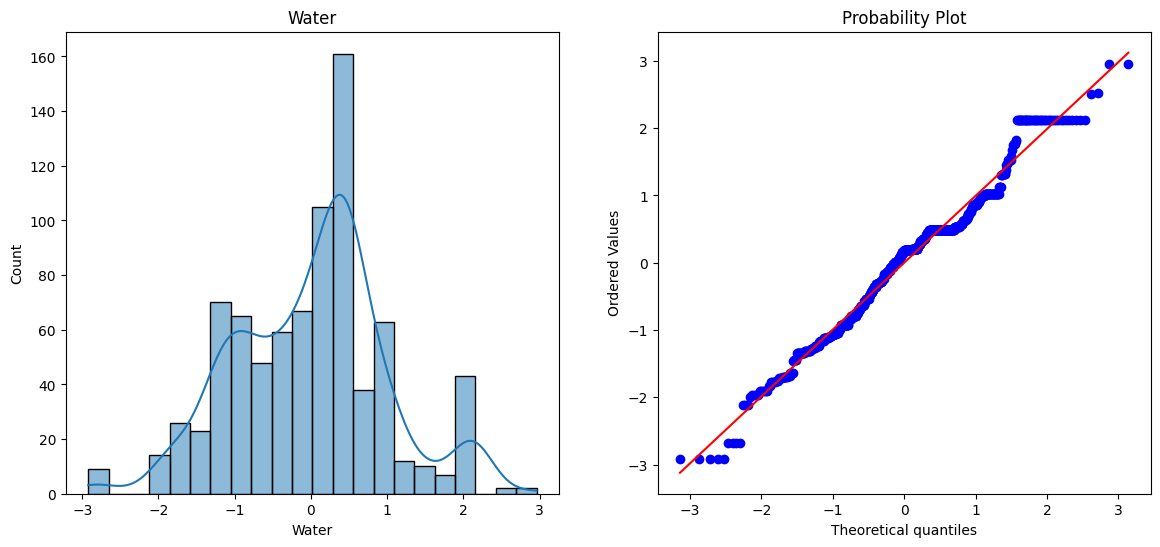

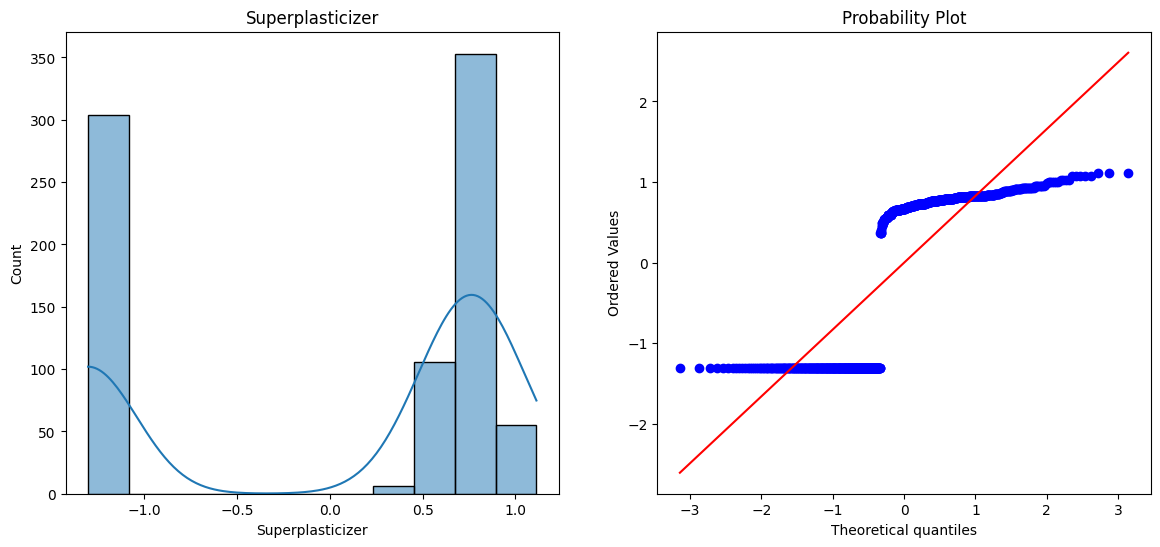

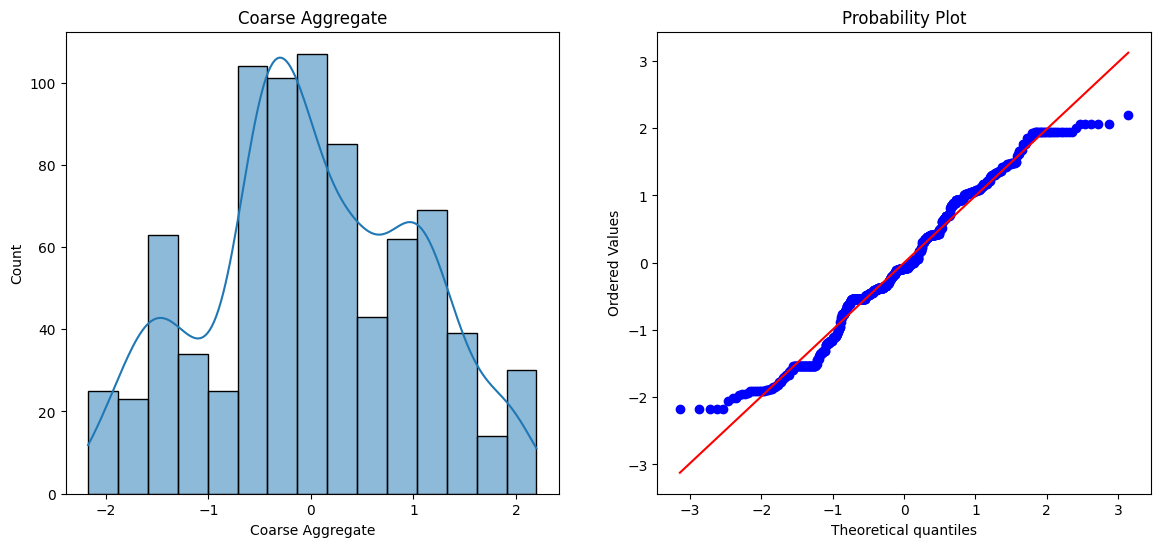

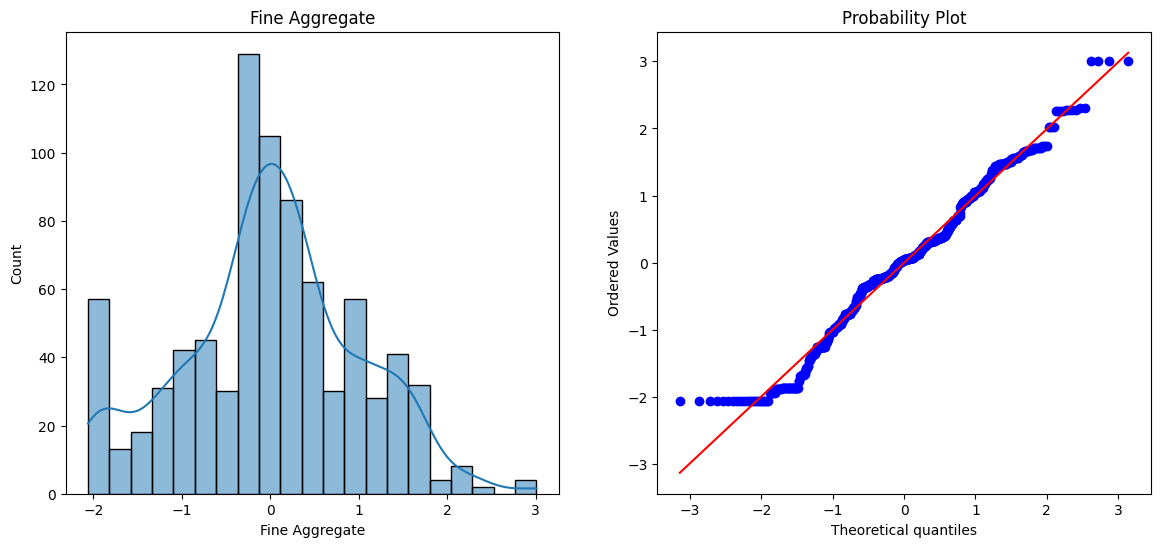

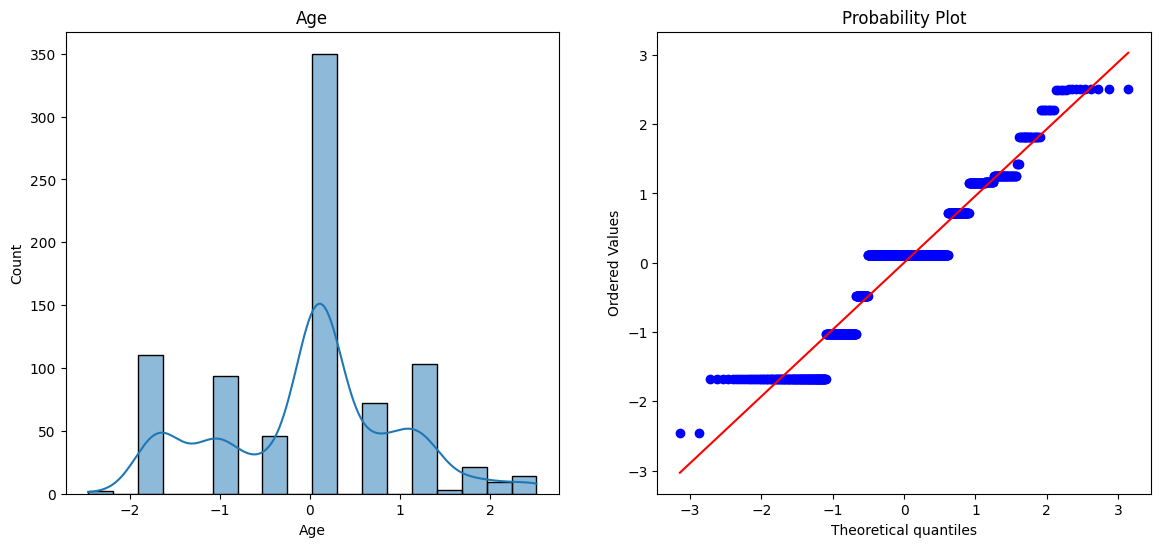

In [30]:
# Plotting the distplots with transformation of Box-Cox
for col in X_train_trf.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    sns.histplot(X_train_trf[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_trf[col], dist="norm", plot=plt)

    plt.show()

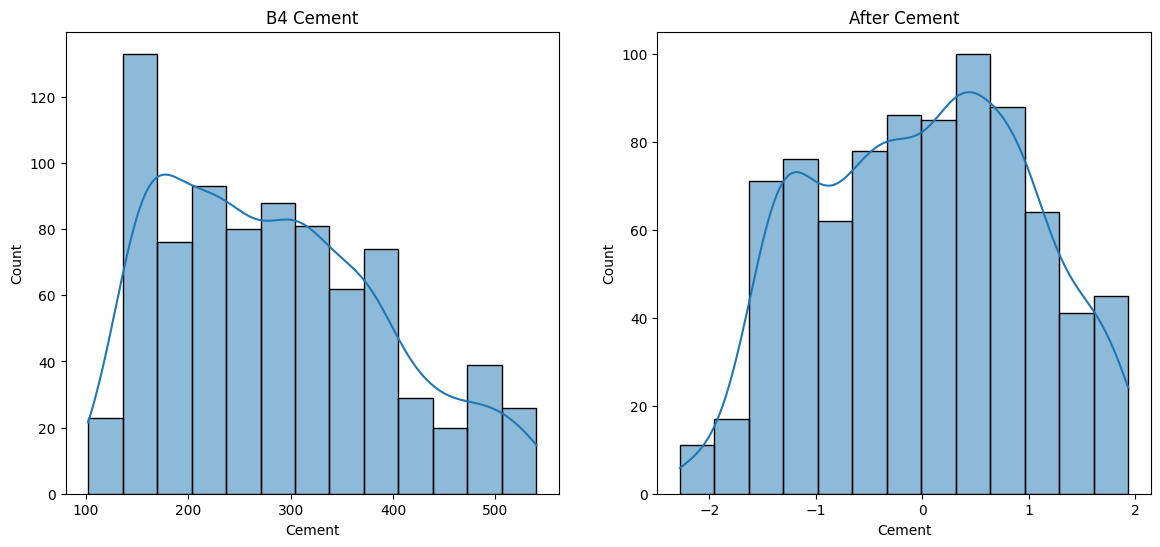

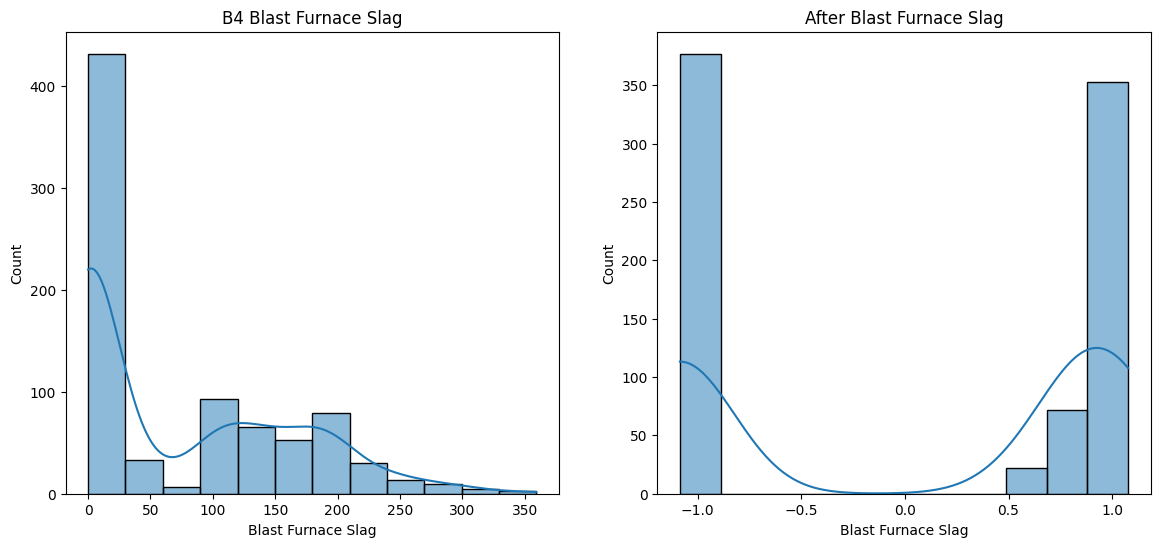

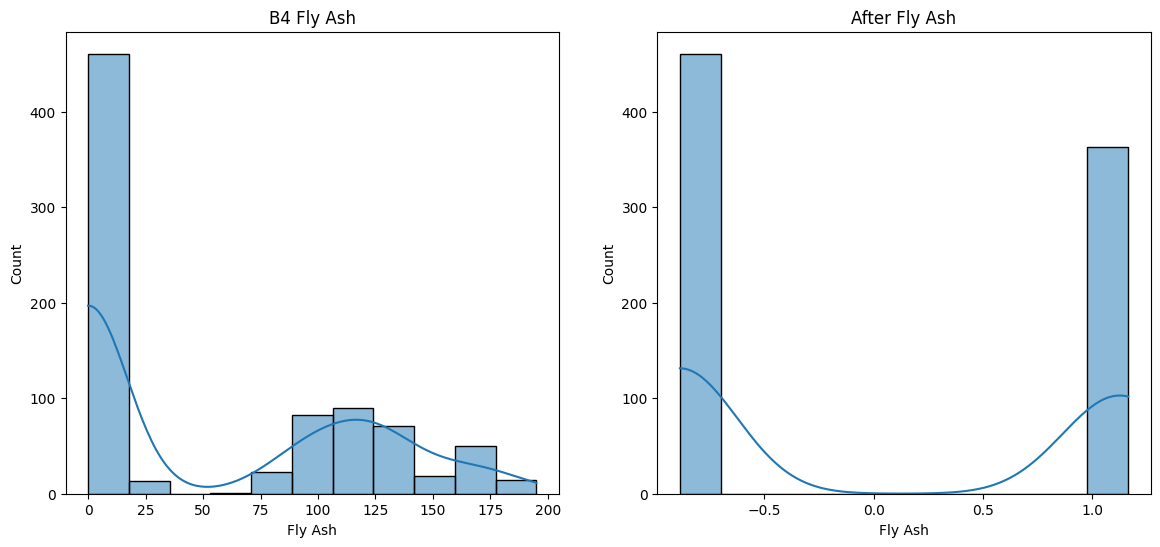

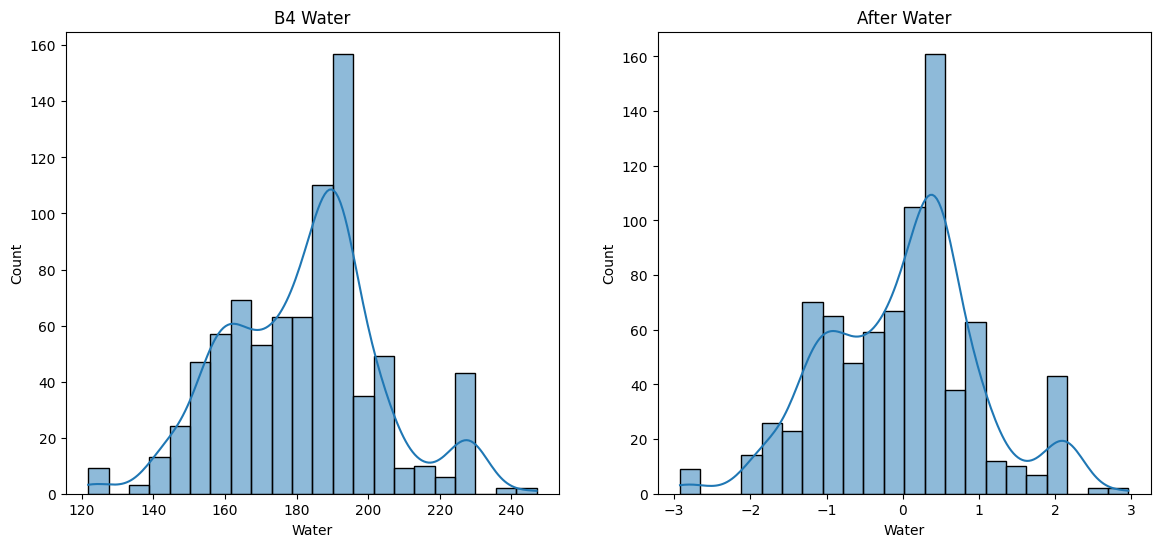

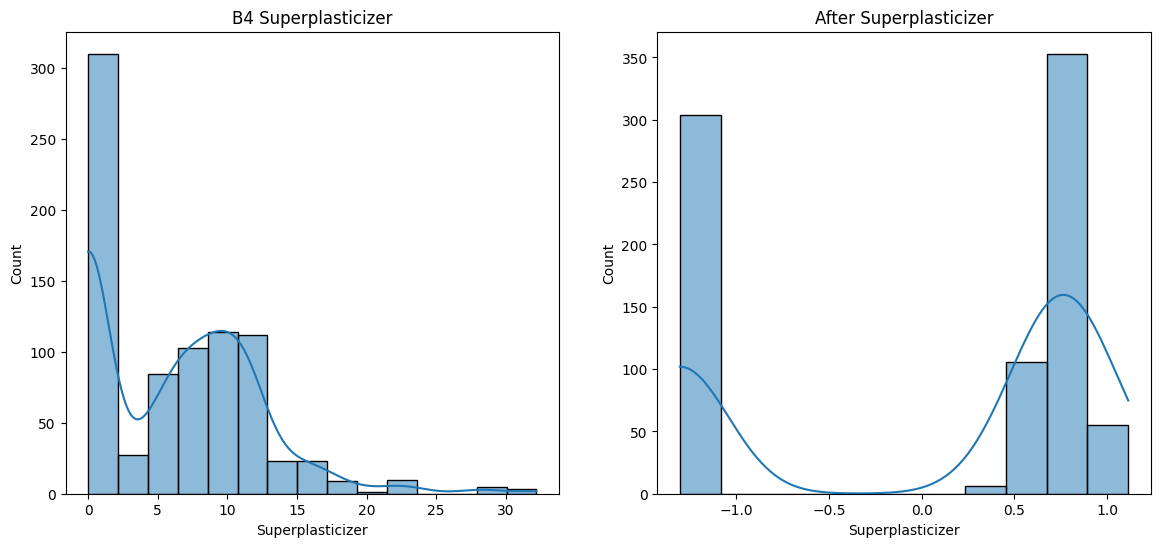

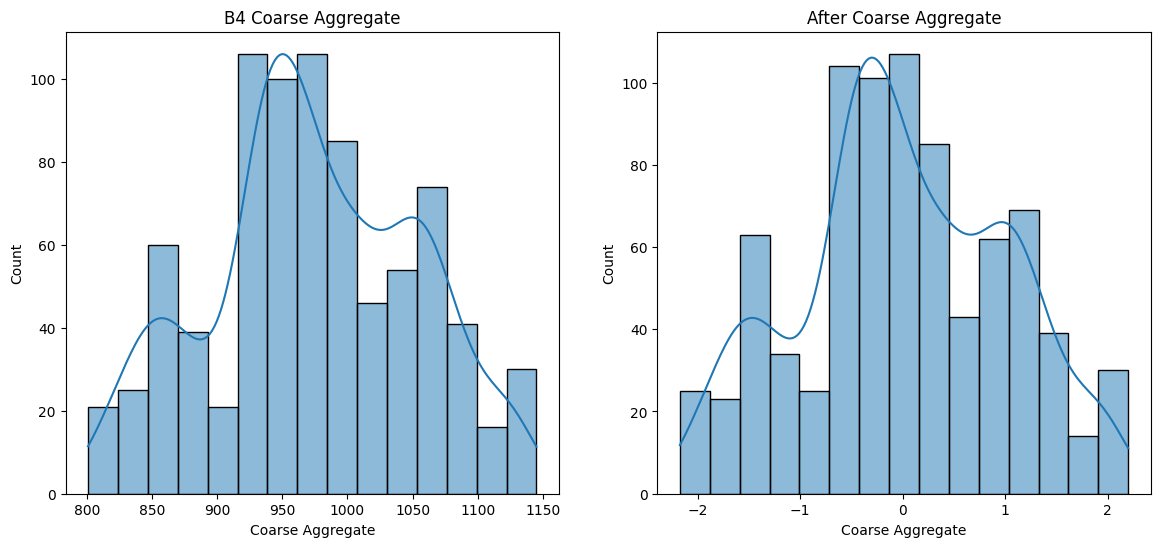

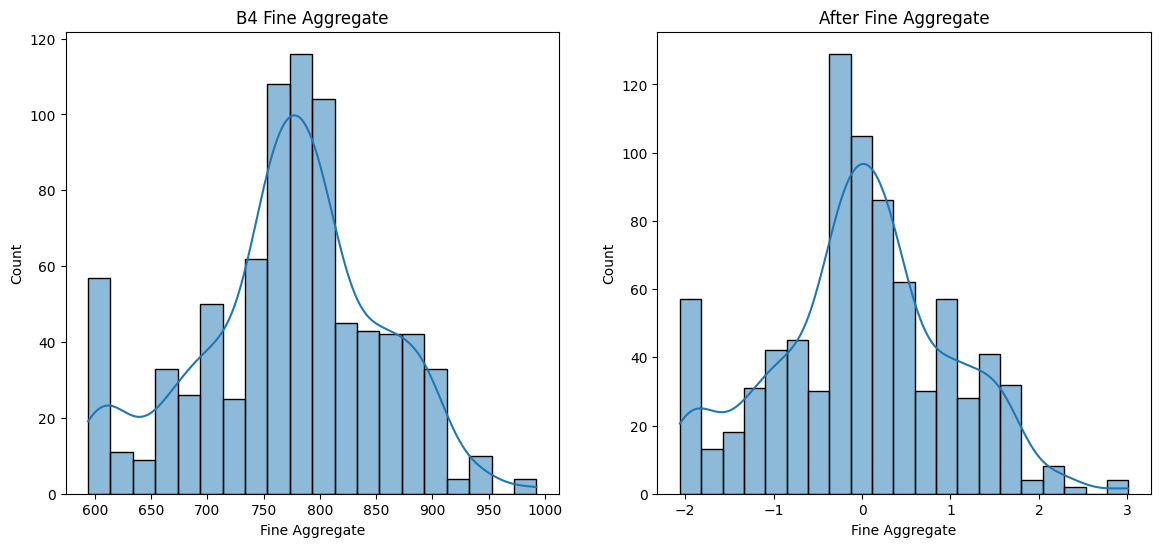

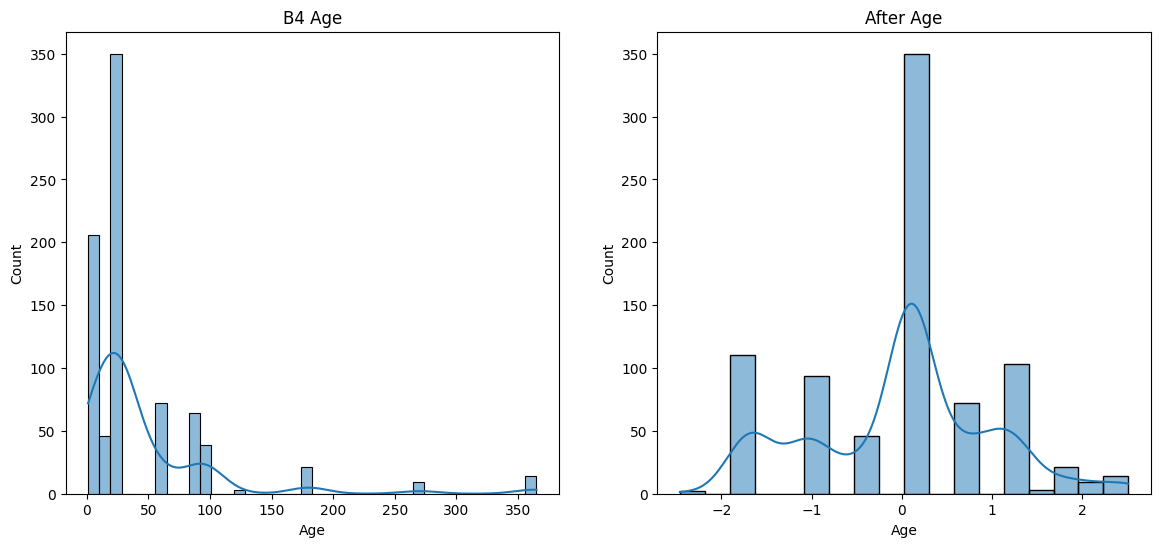

In [21]:
# Compare both histplot of B4 Transformation and After Transformation
for col in X_train_trf.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title("B4 "+col)

    plt.subplot(122)
    sns.histplot(X_train_trf[col], kde=True)
    plt.title("After "+col)

    plt.show()

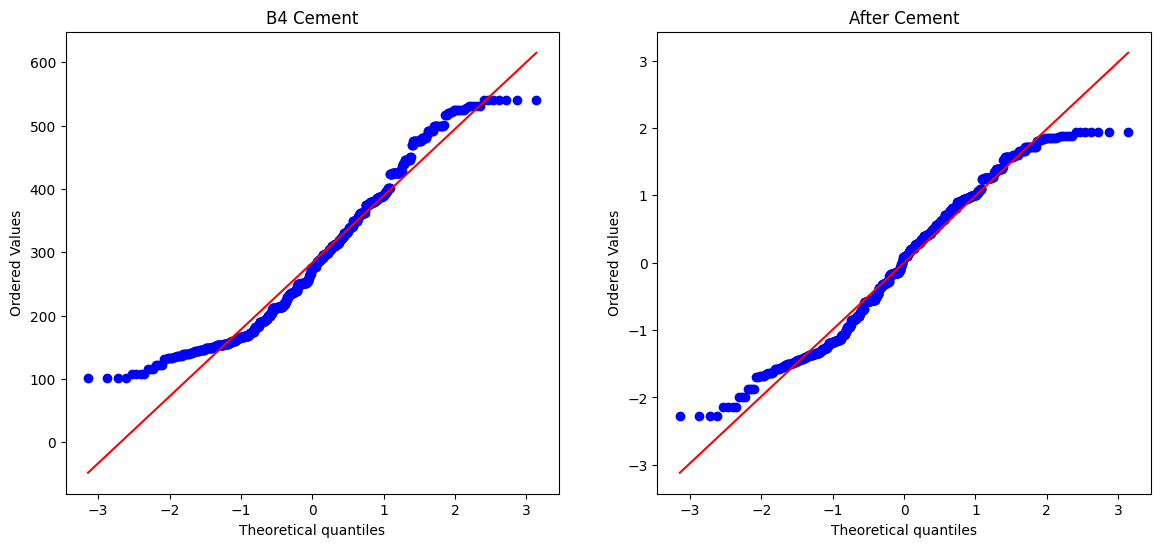

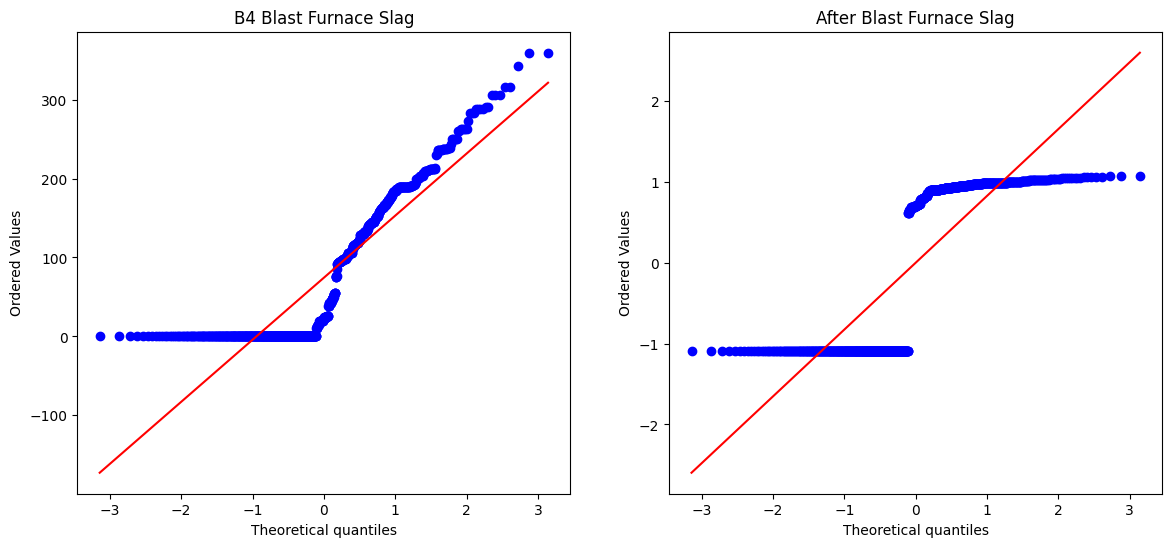

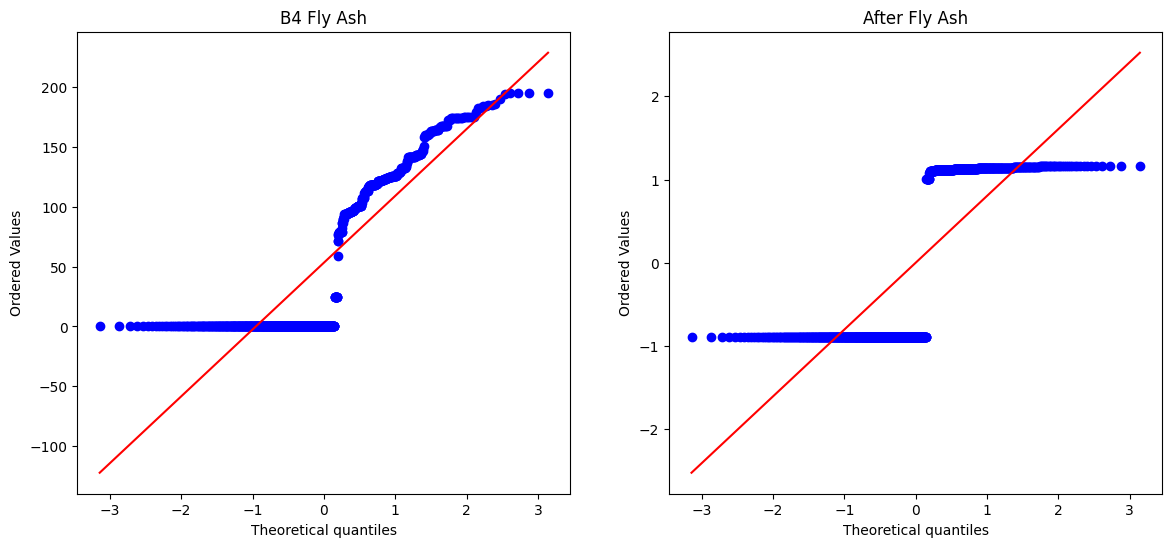

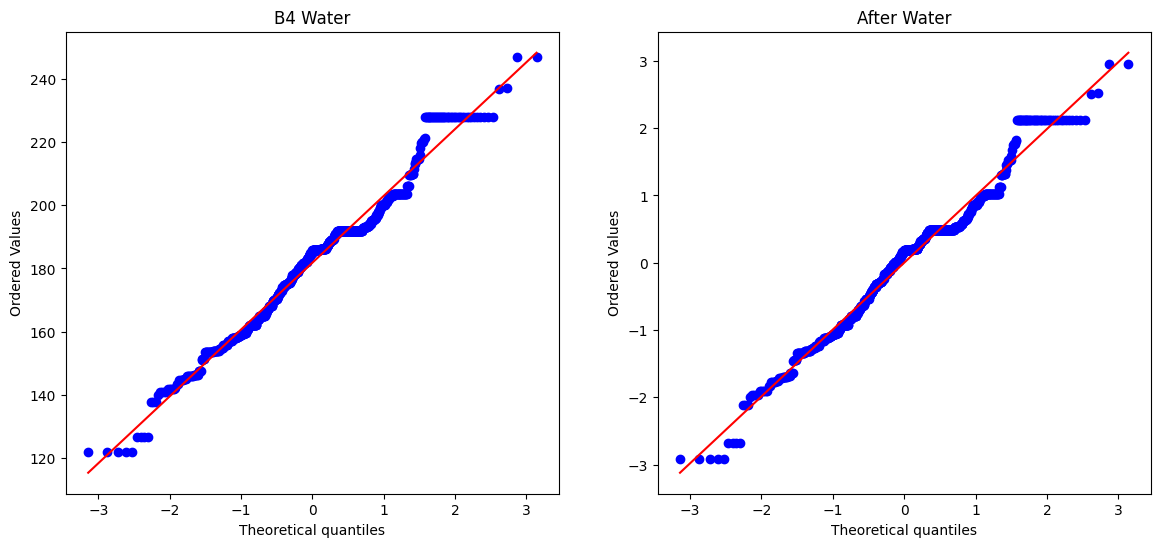

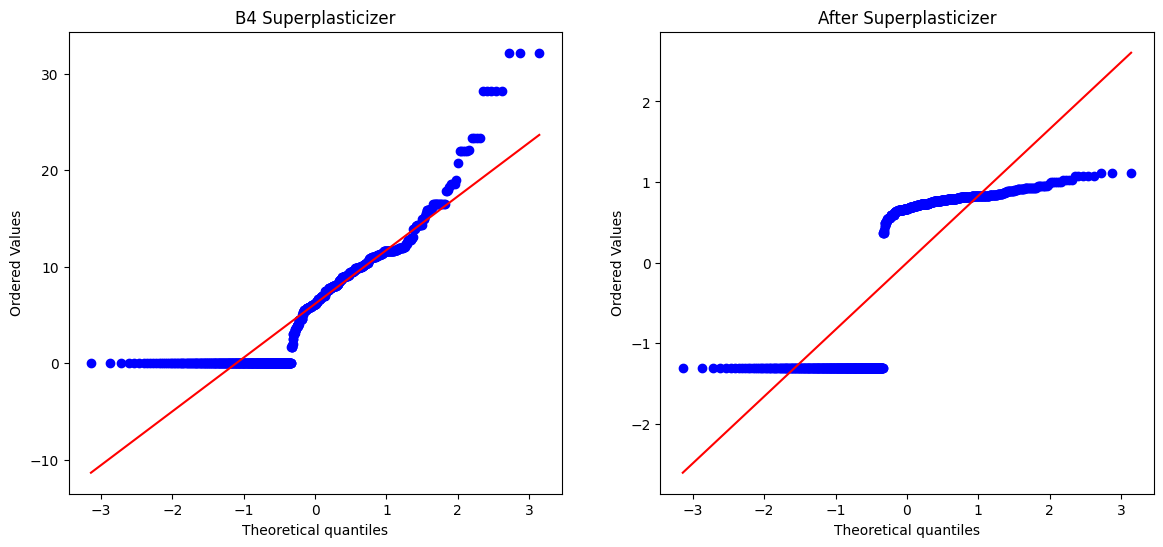

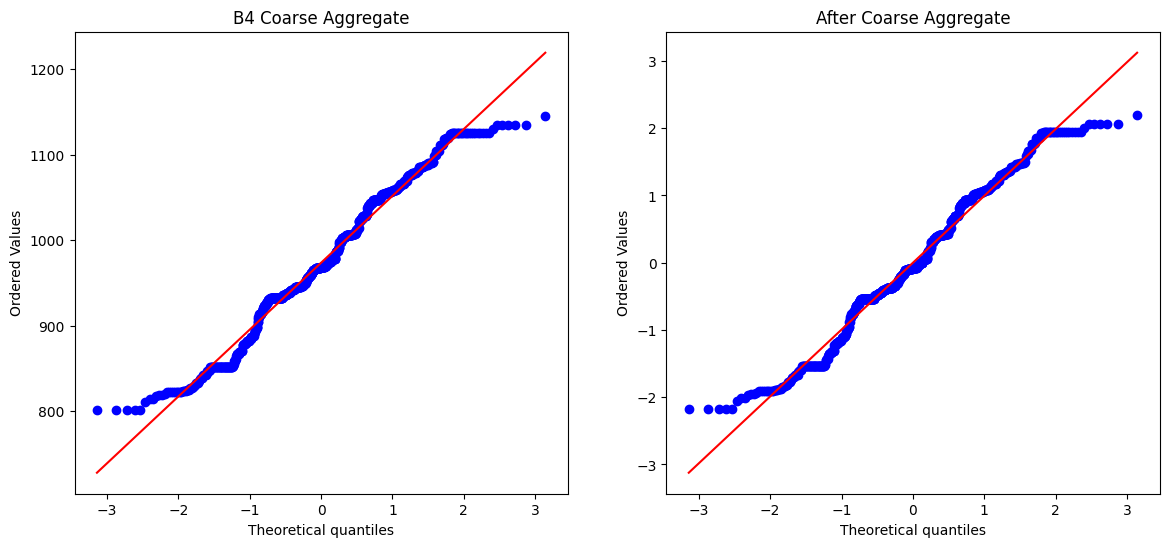

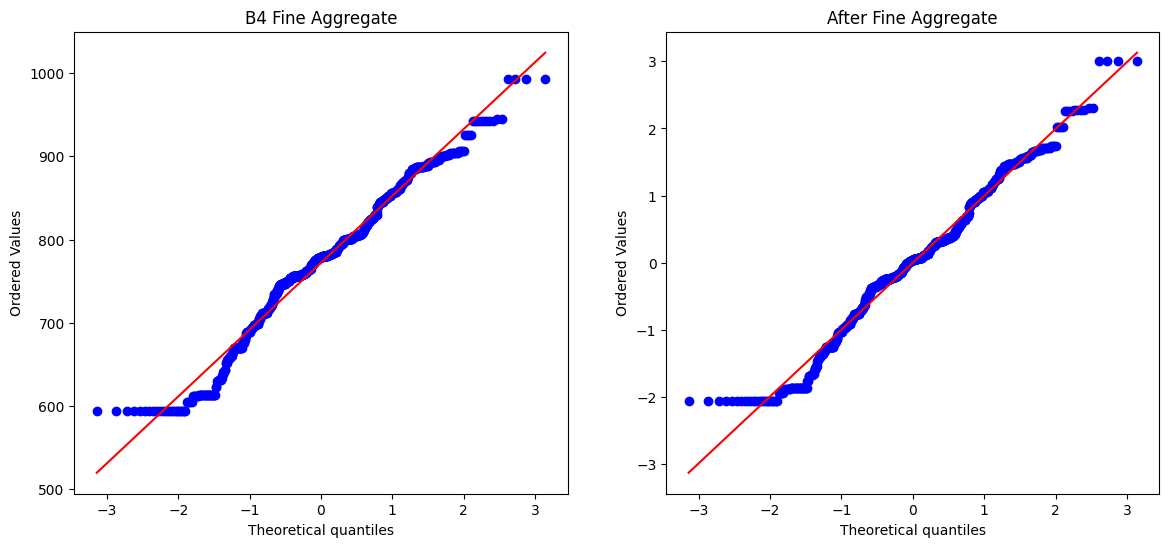

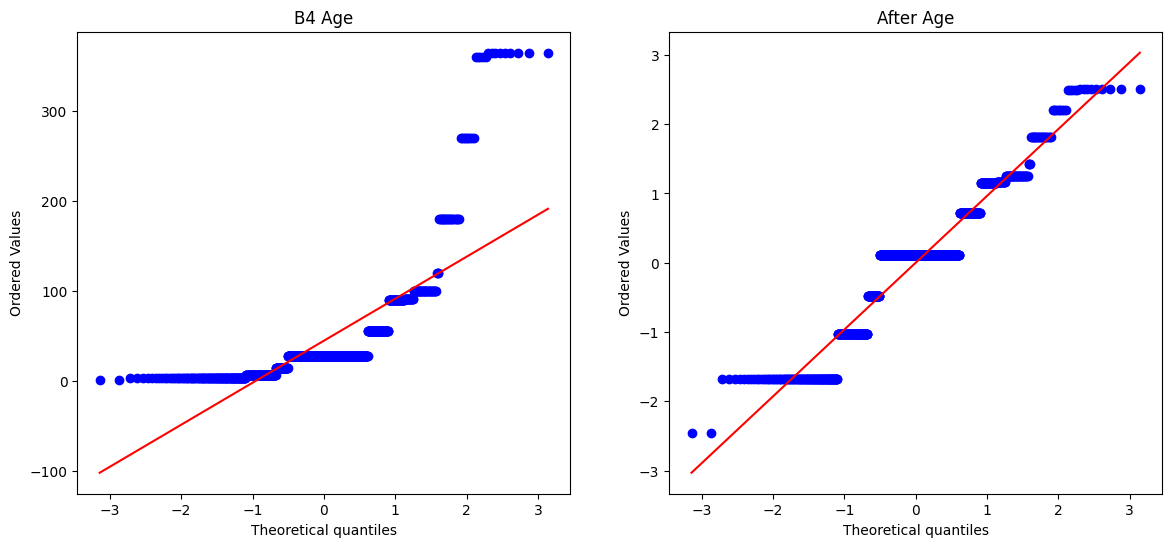

In [22]:
# Compare both QQ-Plot of B4 Transformation and After Transformation
for col in X_train_trf.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title("B4 "+col)

    plt.subplot(122)
    stats.probplot(X_train_trf[col], dist="norm", plot=plt)
    plt.title("After "+col)

    plt.show()

## **<ins style="color:maroon">Applying Yeo-Johnson Transfomation</ins>**

In [24]:
# Applying Box-Cox Transform
pt_y = PowerTransformer()
X_train_trf_y = pt_y.fit_transform(X_train)
X_test_trf_y = pt_y.transform(X_test)

lmd_y = pd.DataFrame({'cols':X_train.columns, 'Yeo_Johnson_lambdas':pt_y.lambdas_})
lmd_y

,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [26]:
lr = LinearRegression()
lr.fit(X_train_trf_y, y_train)
y_pred_y = lr.predict(X_test_trf_y)
r2_score(y_test, y_pred_y)*100


81.61906513339304

In [29]:
# cross checking with cross validation
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train_trf_y, y_train, scoring='r2', cv=10))*100

79.36885678909091

In [35]:
X_train_trf_y = pd.DataFrame(X_train_trf_y, columns=X_train.columns)
X_train_trf_y.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976


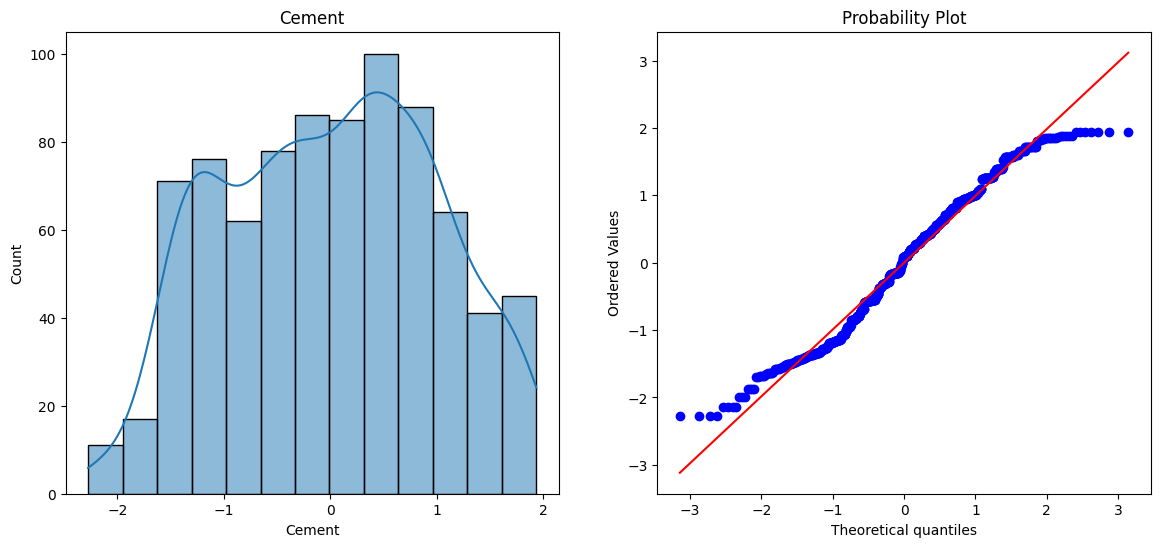

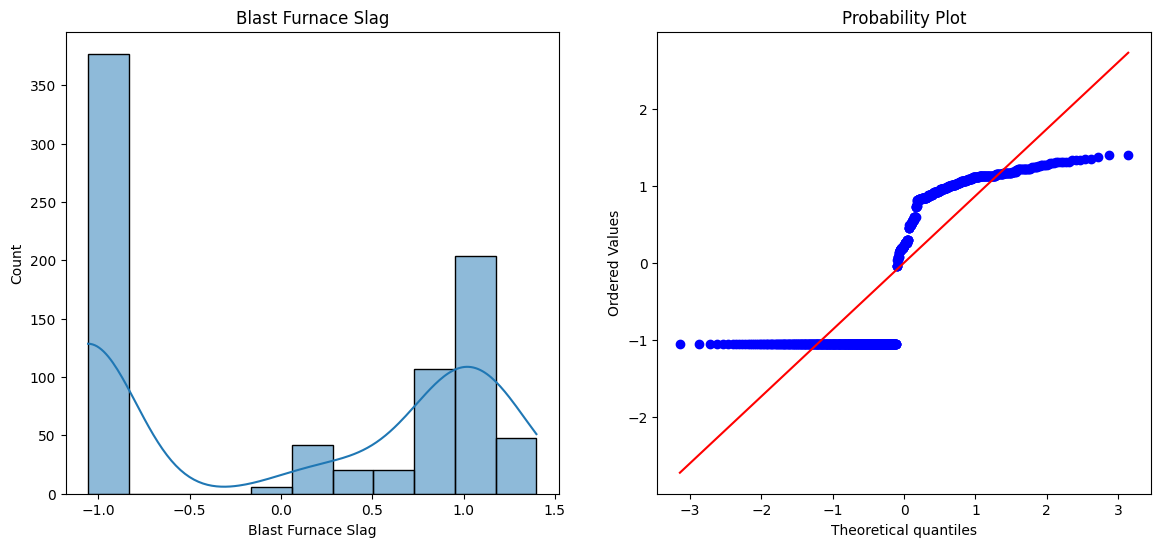

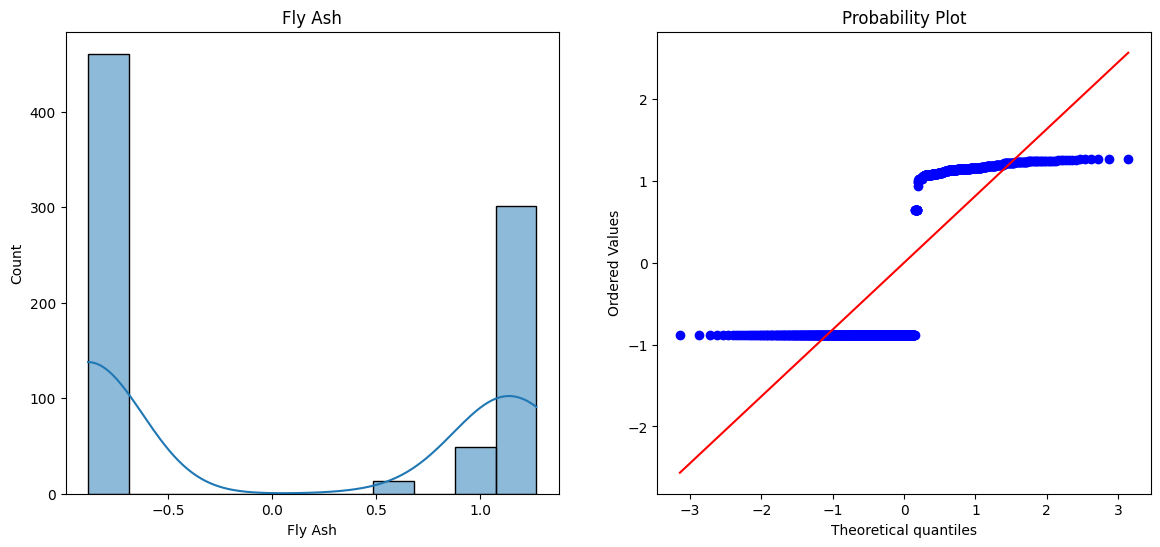

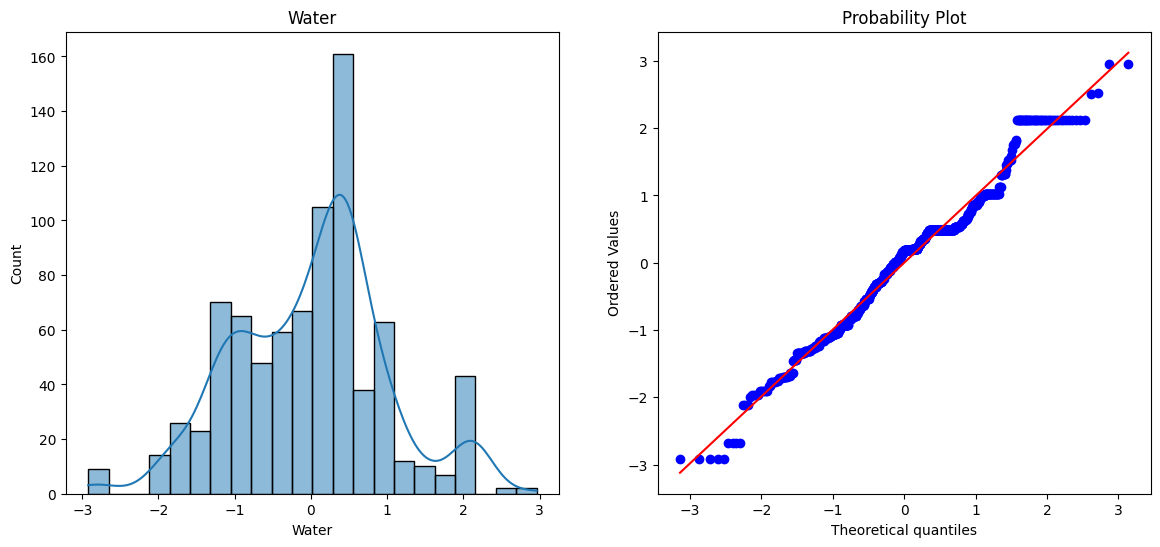

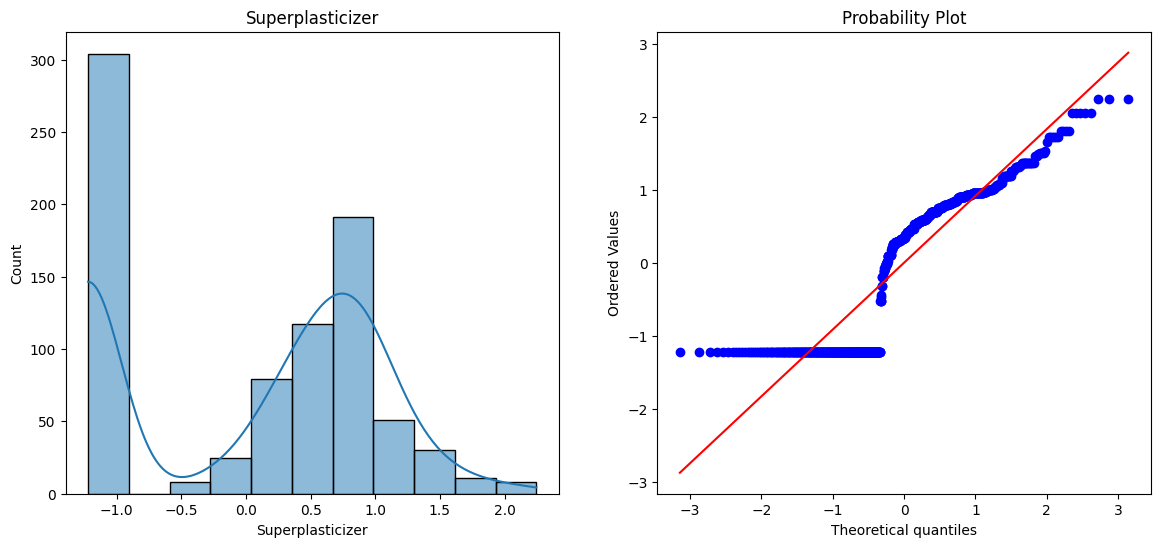

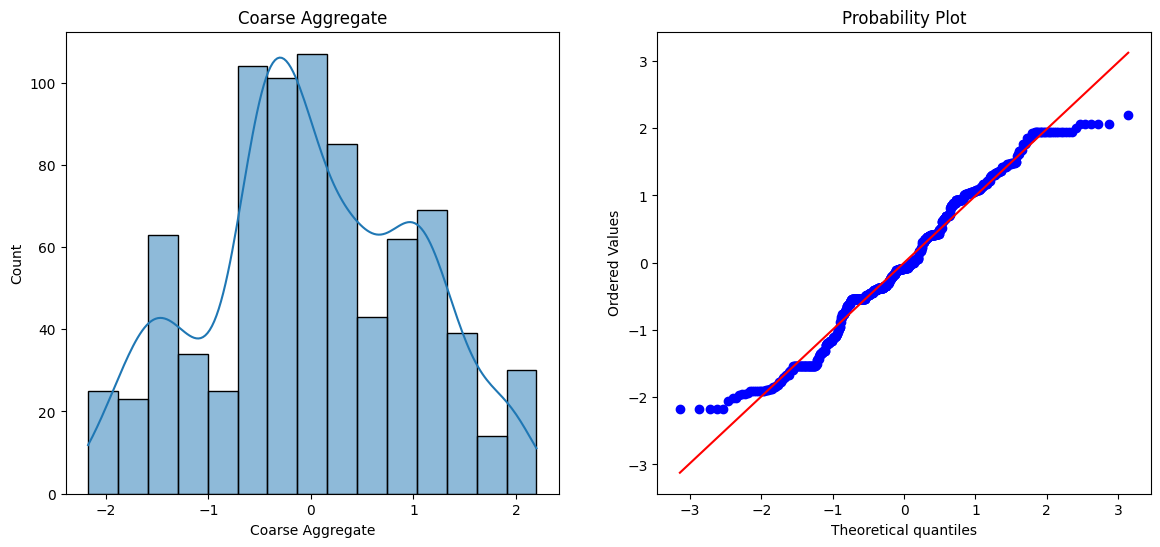

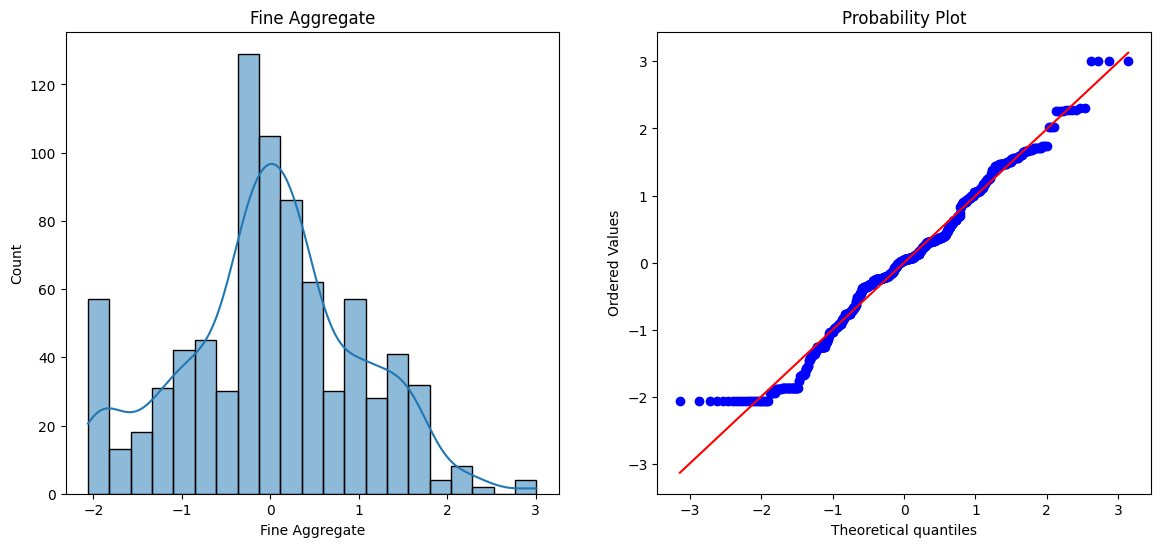

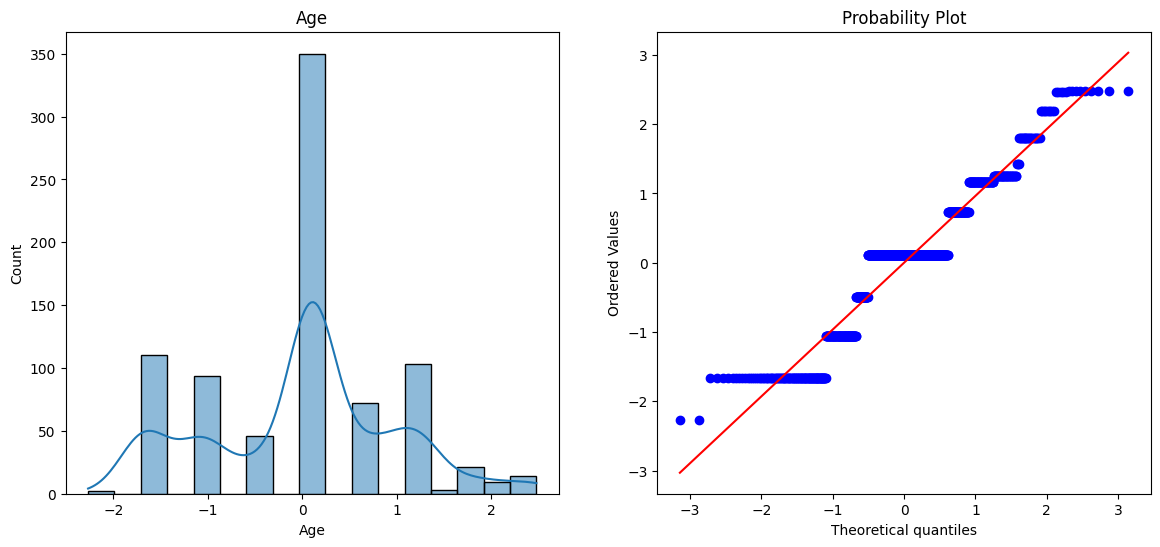

In [36]:
# Plotting the distplots with transformation of Yeo-Johnson
for col in X_train_trf_y.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    sns.histplot(X_train_trf_y[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_trf_y[col], dist="norm", plot=plt)

    plt.show()

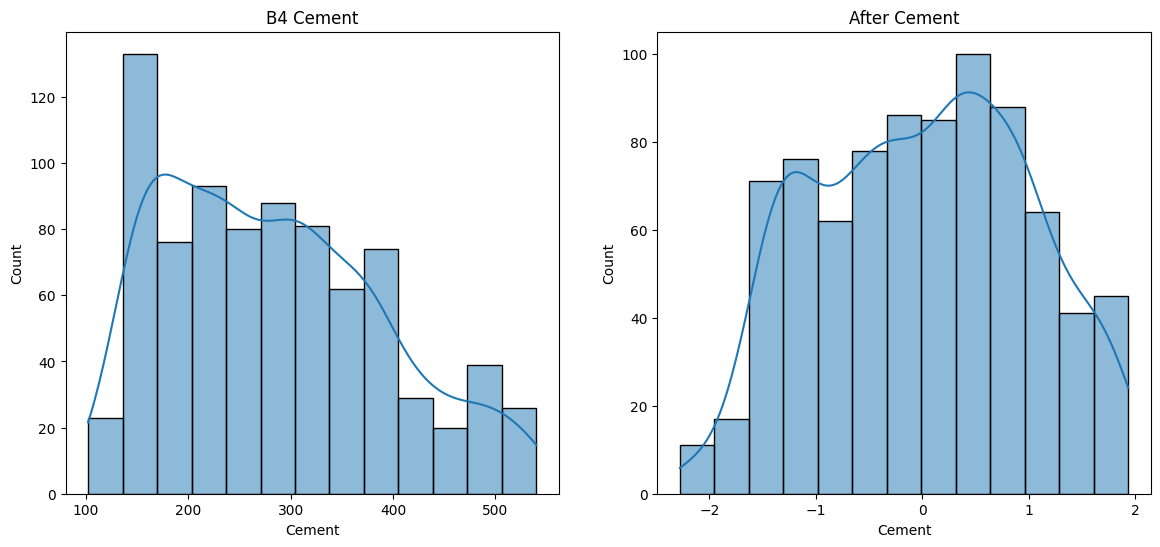

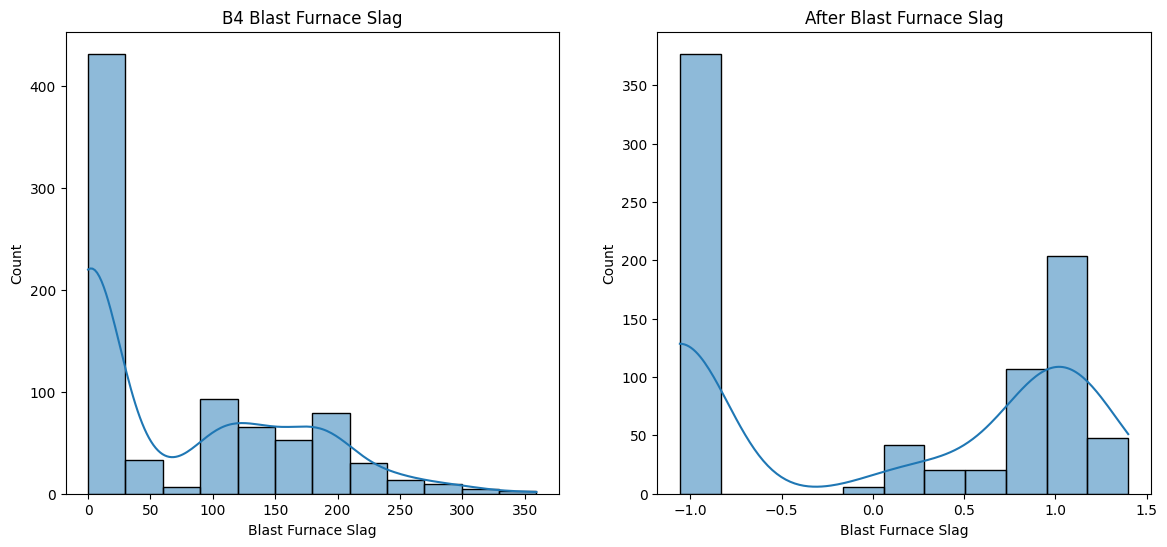

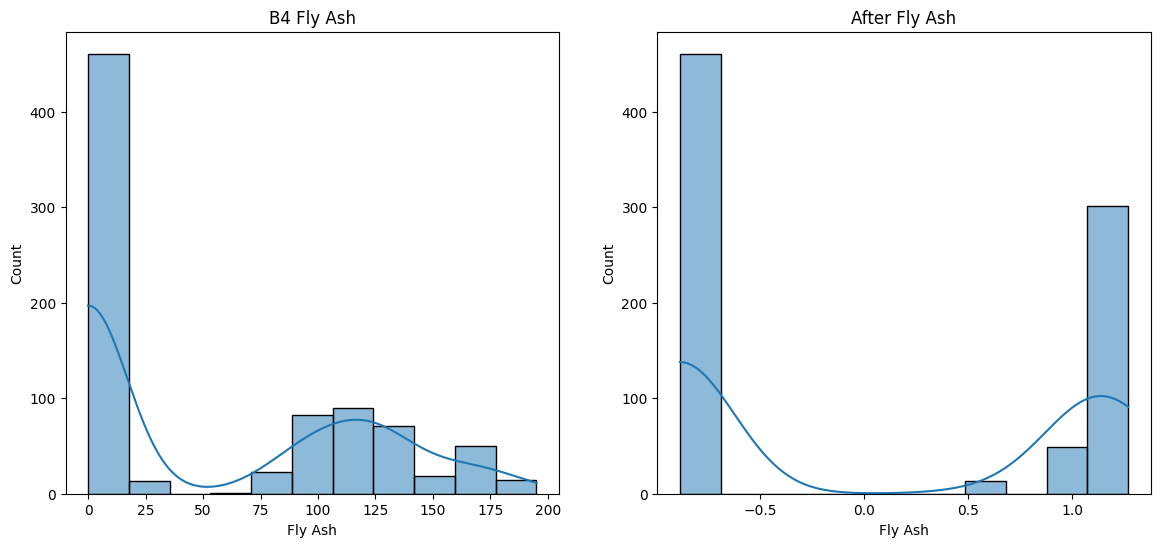

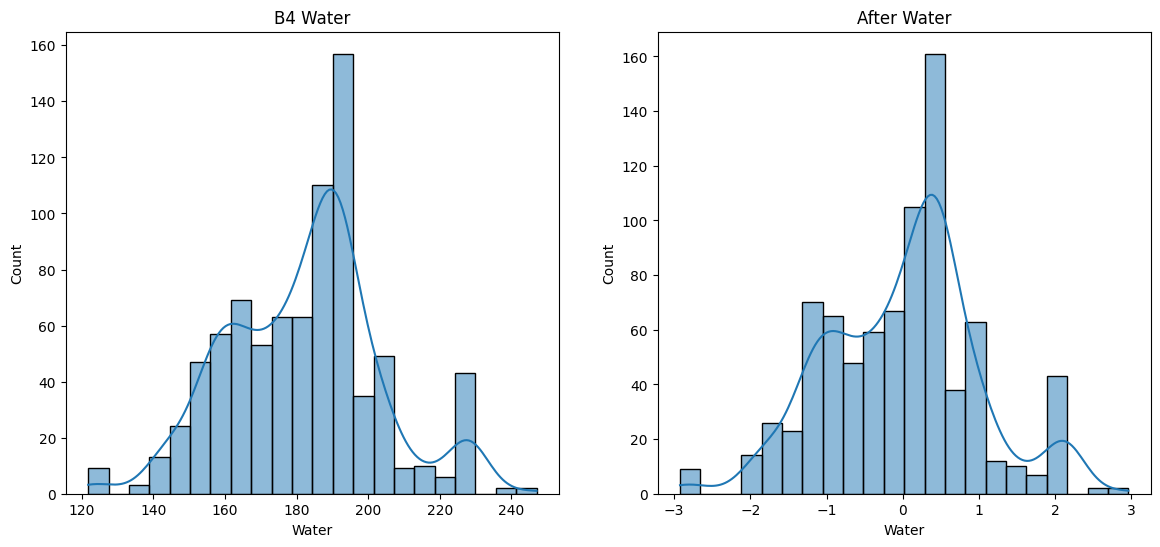

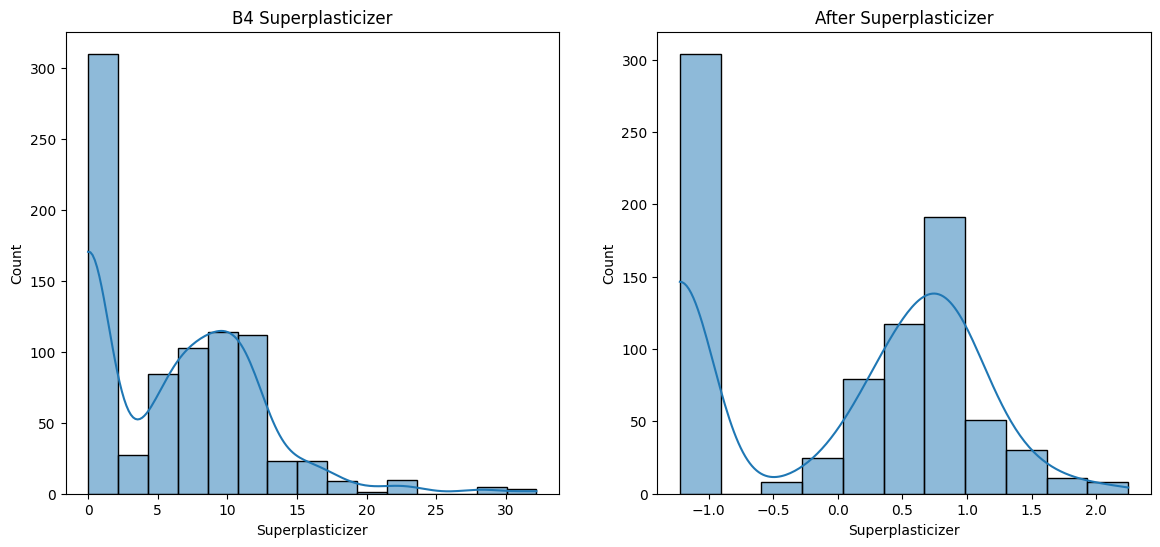

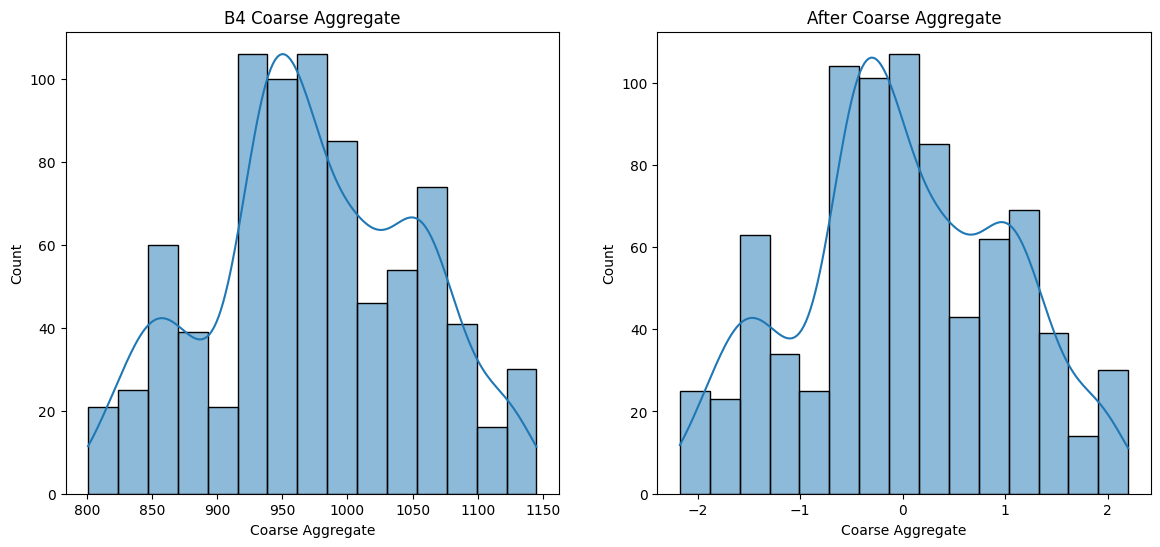

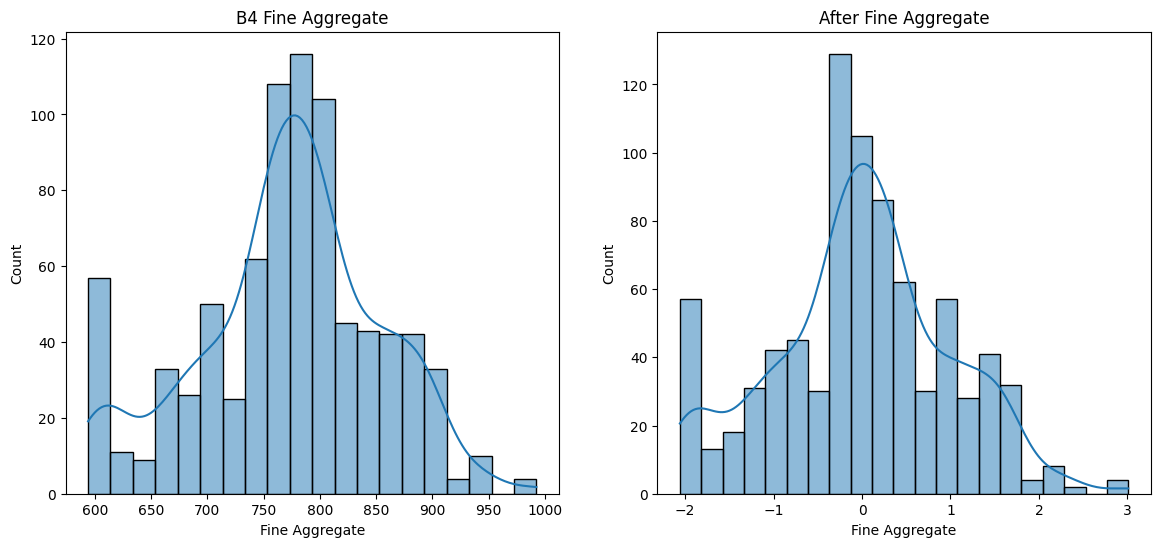

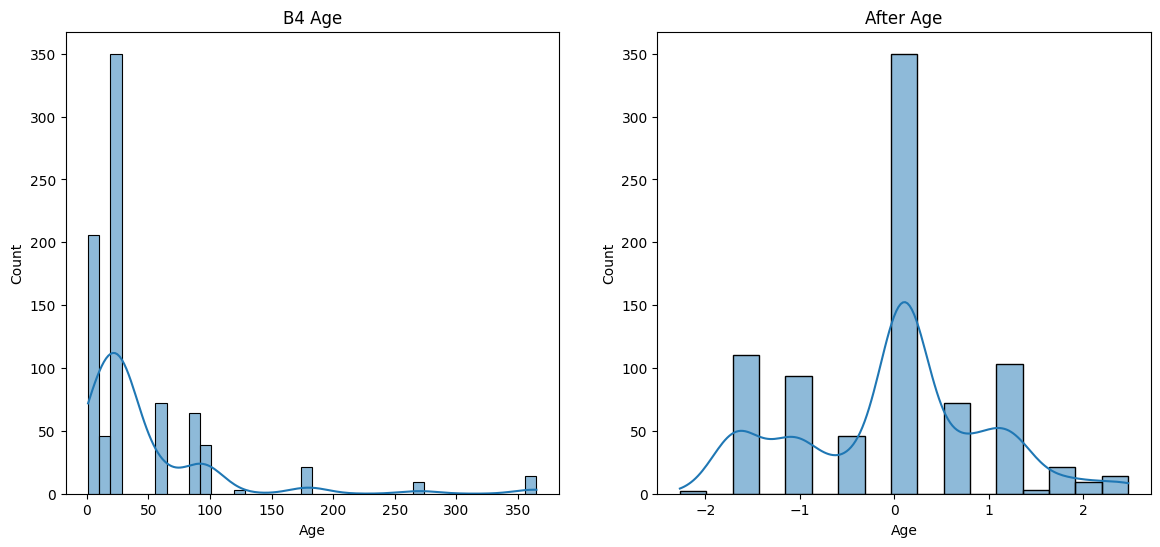

In [40]:
# Plotting the distplots with transformation of Yeo-Johnson
for col in X_train_trf_y.columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title("B4 "+col)

    plt.subplot(122)
    sns.histplot(X_train_trf_y[col], kde=True)
    plt.title("After "+col)

    plt.show()